In [1]:
import datetime
import shutil
import requests
import glob
import os

import zipfile
import glob
import satpy
import warnings

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import random 

warnings.filterwarnings("ignore")
BASE_DIR = "/vol/bitbucket/pn222/satellite/goes_east"

In [2]:
import sys
sys.path.append('../dataproc/')

from utils import get_bbox_square

In [10]:
nc_files = sorted(glob.glob(f"{BASE_DIR}/data/nc/ida/2021-08-29/*.nc"))

In [11]:
filename = nc_files[len(nc_files)//2]
scn = satpy.Scene(reader="abi_l1b", 
                  filenames=[filename])

In [12]:
scn.load(['C13'])

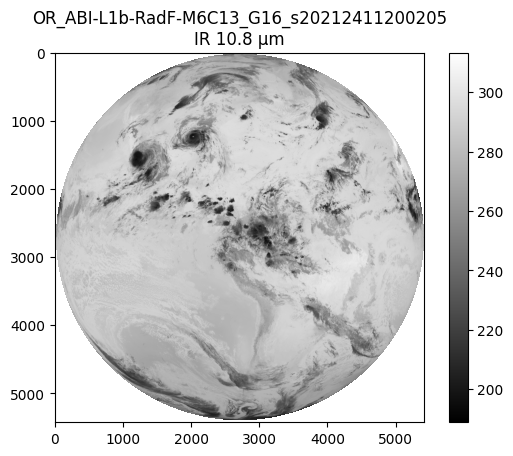

In [13]:
plt.figure()
title = "_".join(filename.split('/')[-1][:-4].split('_')[:4])
plt.title(f"{title}\nIR 10.8 µm")
plt.imshow(scn['C13'], 
           cmap="gray")
plt.colorbar() ;

In [14]:
map_x0, map_y0 = -80.1918, 25.7617
hs_length = 22

map_bounds = get_bbox_square(map_x0, map_y0, hs_length)
mc_scn = scn.crop(ll_bbox=map_bounds).resample(resampler='native')
ir108_scn = mc_scn['C13']

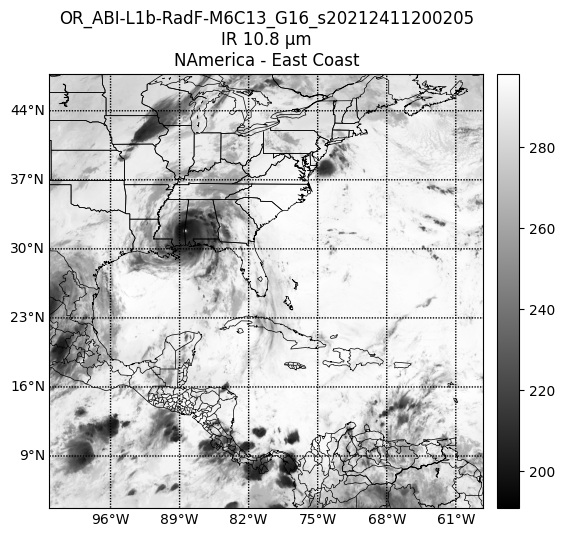

In [15]:
extent = ir108_scn.attrs['area'].get_lonlats()

m = Basemap(llcrnrlon=map_bounds[0], llcrnrlat=map_bounds[1],
            urcrnrlon=map_bounds[2], urcrnrlat=map_bounds[3],
            projection='cyl', resolution='l')

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

kwargs = {
    "linewidth": 0.5,
    "color": "k",
}

m.drawcoastlines(**kwargs)
m.drawcountries(**kwargs)
m.drawstates(**kwargs)
img = m.imshow(ir108_scn.data, origin='upper', extent=map_bounds, cmap="gray")

m.drawparallels(range(int(map_bounds[1])-1, int(map_bounds[3]), 7), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(range(int(map_bounds[0])-1, int(map_bounds[2]), 7), labels=[0, 0, 0, 1], fontsize=10)

cbar = plt.colorbar(img)
ax_pos = ax.get_position()
cbar.ax.set_position([ax_pos.x0 + ax_pos.width + 0.02, ax_pos.y0, 0.1, ax_pos.height])

plt.title(f"{title}\nIR 10.8 µm\nNAmerica - East Coast")
plt.show()

In [16]:
lon, lat = scn['C13'].attrs['area'].get_lonlats()

f_lon = lon[~np.isinf(lon)]
f_lat = lat[~np.isinf(lat)]

y_north = np.max(f_lat)
y_south = np.min(f_lat)
x_east  = np.max(f_lon)
x_west  = np.min(f_lon)

print("GOES_EAST_WBOX:", (x_west, y_south, x_east, y_north))

GOES_EAST_WBOX: (-156.19630215232982, -81.14754058985199, 6.196302152329821, 81.14754058985199)
